In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
from ripser import ripser
import matplotlib.pyplot as plt

In [2]:
upto = 10000
data_loc = '/home/gebhart/projects/rfunklab/data/patents_20190722'

In [3]:
knowl_graph = nx.Graph()

In [4]:
knowl_df = pd.read_csv(os.path.join(data_loc, 'knowledge_edges.csv'), header=0)

In [5]:
knowl_df.shape

(4181178, 3)

In [6]:
for idx, row in knowl_df.iterrows():
    if idx >= upto:
        break
    knowl_graph.add_edge(row['subgroup_id_a'], row['subgroup_id_b'], weight=row['patents'])

In [7]:
len(knowl_graph.edges())

10000

In [8]:
len(knowl_graph.nodes())

3925

In [9]:
kgm = nx.to_scipy_sparse_matrix(knowl_graph)

In [10]:
rips = ripser(kgm, distance_matrix=True, maxdim=4)

In [11]:
rips

{'dgms': [array([[ 0.,  1.],
         [ 0.,  1.],
         [ 0.,  1.],
         ...,
         [ 0., inf],
         [ 0., inf],
         [ 0., inf]]), array([[ 6., 10.],
         [ 6., inf],
         [ 6.,  9.],
         ...,
         [ 1., inf],
         [ 1.,  5.],
         [ 1.,  8.]]), array([[ 7., 10.],
         [ 7., 10.],
         [ 5.,  7.],
         [ 5.,  8.],
         [ 5.,  7.],
         [ 5.,  7.],
         [ 4.,  7.],
         [ 4.,  7.],
         [ 4.,  6.],
         [ 4.,  5.],
         [ 4.,  5.],
         [ 4.,  7.],
         [ 4.,  5.],
         [ 4.,  5.],
         [ 4.,  7.],
         [ 4.,  5.],
         [ 4.,  6.],
         [ 3.,  7.],
         [ 3.,  8.],
         [ 3.,  7.],
         [ 3.,  7.],
         [ 3.,  6.],
         [ 3.,  7.],
         [ 3.,  6.],
         [ 3.,  7.],
         [ 3.,  4.],
         [ 3.,  7.],
         [ 3.,  7.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  4.]

In [12]:
def plot_diagram(diagram, title=''):
    fig, ax = plt.subplots()
    if diagram.size > 0:
        d = diagram[~np.isinf(diagram[:,1])]
        if d.shape[0] > 0:
            ax.scatter(d[:,0], d[:,1], s=25, c=d[:,0]**2 - d[:,1], cmap=plt.cm.coolwarm, zorder=10)
            lims = [
                np.min(d[:,0]-5),  # min of both axes
                np.max(d[:,1]+5),  # max of both axes
            ]

            # now plot both limits against eachother
            ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
            ax.set_xlim(lims)
            ax.set_ylim(lims)
    ax.set_aspect('equal')
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title(title)

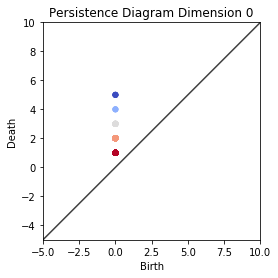

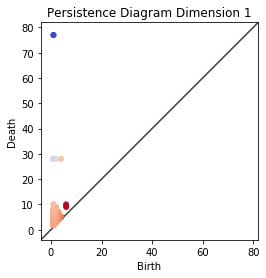

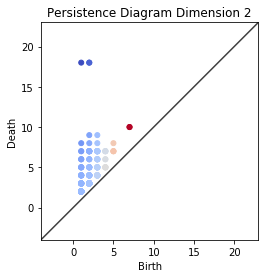

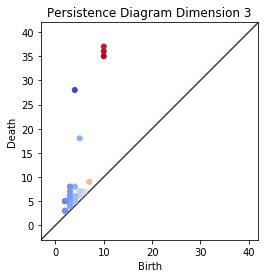

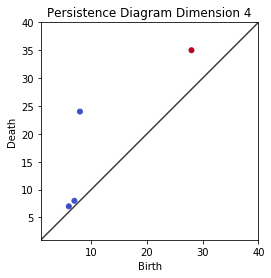

In [13]:
for i in range(len(rips['dgms'])):
    plot_diagram(rips['dgms'][i], title='Persistence Diagram Dimension {}'.format(i))